#### Sort homework

Implement bubble-sort, merge-sort and quick-sort algorithms as three functions with input argument — array and output is sorted array. Compare its running time depending on the size of array and also compare running time your functions with built-in method sort. Plot lines time vs. array size for every sorting algorithm. Time has to be computed with %timeit magic. How plot lines see further in this notebook.

In [51]:
def ascending_comparator(a, b):
    if a > b:
        return 1
    if a < b:
        return -1
    return 0


def descending_comparator(a, b):
    return -ascending_comparator(a, b)


def bubble_sort(input_array, comparator):
    copy_array = input_array[:]
    array_length = len(copy_array)
    for j in range(array_length):
        swapped = False
        for i in range(array_length - j - 1):
            if comparator(copy_array[i], copy_array[i + 1]) > 0:
                copy_array[i], copy_array[i + 1] = copy_array[i + 1], copy_array[i]
                swapped = True

        if not swapped:
            break

    return copy_array


def selection_sort(input_array, comparator):
    copy_array = input_array[:]
    array_length = len(copy_array)
    for j in range(array_length - 1):
        swap_with = j
        for i in range(j + 1, array_length):
            if comparator(copy_array[i], copy_array[swap_with]) <= 0:
                swap_with = i

        if swap_with != j:
            copy_array[j], copy_array[swap_with] = copy_array[swap_with], copy_array[j]

    return copy_array


def merge_arrays(left, right, comparator):
    left_index = 0
    right_index = 0
    left_length = len(left)
    right_length = len(right)

    result = []
    while left_index < left_length and right_index < right_length:
        if comparator(left[left_index], right[right_index]) <= 0:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    if left_index < left_length:
        result += left[left_index:]

    if right_index < right_length:
        result += right[right_index:]

    return result


def merge_sort(input_array, comparator):
    array_length = len(input_array)
    if array_length <= 16:
        return selection_sort(input_array, comparator)

    middle = int(array_length / 2)

    left = merge_sort(input_array[:middle], comparator)
    right = merge_sort(input_array[middle:], comparator)

    return merge_arrays(left, right, comparator)

def quick_sort(input_array, comparator):
    less = []
    equal = []
    greater = []

    if len(input_array) > 1:
        pivot = input_array[0]
        for x in input_array:
            if x < pivot:
                less.append(x)
            if x == pivot:
                equal.append(x)
            if x > pivot:
                greater.append(x)
        return quick_sort(less, comparator) + equal + quick_sort(greater, comparator)
    else:
        return input_array
    

In [53]:
import random

sizes = [ 2 ** i for i in range(11) ]
print("Sizes:", sizes)

bubble_sort_times = []
selection_sort_times = []
merge_sort_times = []
quick_sort_times = []

for size in sizes:
    array = [int(10000 * random.random()) for k in range(size)]
    bubble_sort_result = %timeit -o -q bubble_sort(array, ascending_comparator)
    selection_sort_result = %timeit -o -q selection_sort(array, ascending_comparator)
    merge_sort_result = %timeit -o -q merge_sort(array, ascending_comparator)
    quick_sort_result = %timeit -o -q quick_sort(array, ascending_comparator)
    
    bubble_sort_times.append(bubble_sort_result.best)
    selection_sort_times.append(selection_sort_result.best)
    merge_sort_times.append(merge_sort_result.best)
    quick_sort_times.append(quick_sort_result.best)
    print("Completed timeit for size", size)
    
print("Completed timeit")    
# print("Bubble:", bubble_sort_times)
# print("Selection:", selection_sort_times)
# print("Merge:", merge_sort_times)

Sizes: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
Completed timeit for size 1
Completed timeit for size 2
Completed timeit for size 4
Completed timeit for size 8
Completed timeit for size 16
Completed timeit for size 32
Completed timeit for size 64
Completed timeit for size 128
Completed timeit for size 256
Completed timeit for size 512
Completed timeit for size 1024
Completed timeit


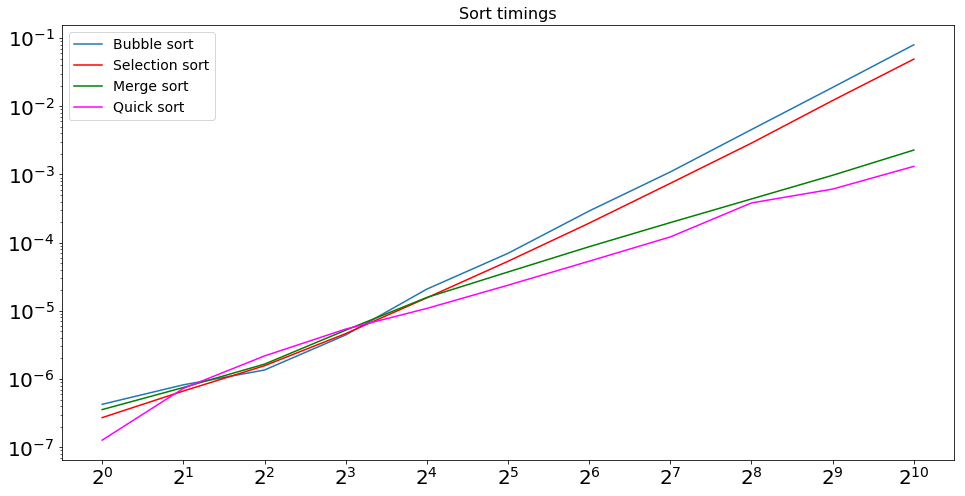

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(16, 8))
plt.title("Sort timings", fontsize=16)
plt.plot(sizes, bubble_sort_times, label="Bubble sort")
plt.plot(sizes, selection_sort_times, color="red", label="Selection sort")
plt.plot(sizes, merge_sort_times, color="green", label="Merge sort")
plt.plot(sizes, quick_sort_times, color="magenta", label="Quick sort")
plt.yscale('log')
plt.xscale('log', basex = 2)
plt.legend(loc="best", fontsize=14)
plt.xticks(sizes,fontsize=20)
_ = plt.yticks(fontsize=20)

#### Series homework

Show convergence of Taylor expansion for functions sin(x)sin⁡(x), exex and 11−x11−x. Plot approximation error vs. number of items in sum. Compare different strategies of ordering items in sum. To compute required functions use numpy library

In [5]:
import math
import numpy as np


def sin_series(point, count):
    result = 0
    for n in range(count):
        item = point ** (2 * n + 1) / math.factorial(2 * n + 1)
        if n % 2 == 0:
            result += item
        else:
            result -= item
    return result


def e_series(point, count):
    result = 0
    for n in range(count):
        result += point ** n / math.factorial(n)
    return result


def geom_series(point, count):
    result = 0

    current = 1
    for n in range(count):
        result += current
        current *= point

    return result

In [3]:
counts = range(1, 40)

sin_errors = []
for i in counts:
    sin_errors.append(abs(sin_series(math.pi, i) - np.sin(math.pi)))

e_errors = []
for i in counts:
    e_errors.append(abs(e_series(2, i) - np.exp(2)))

geom_errors = []
for i in counts:
    geom_errors.append(abs(geom_series(0.5, i) - 2))

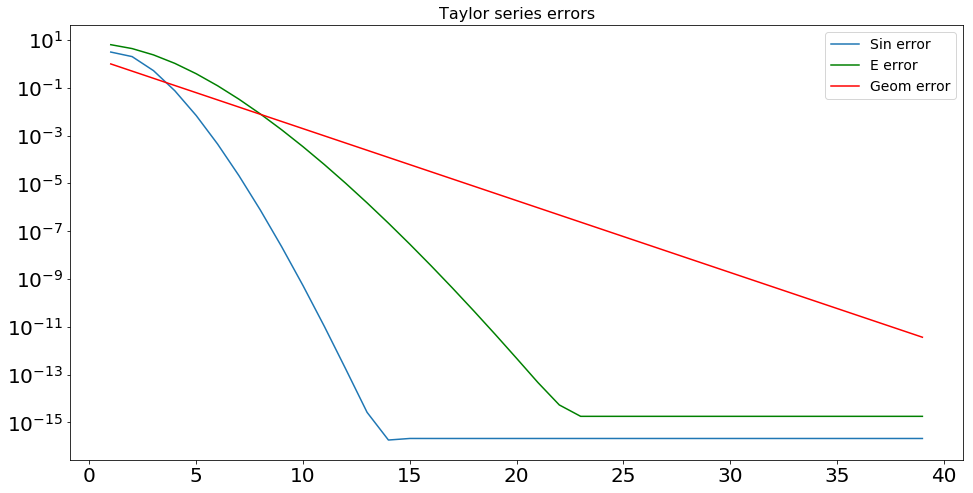

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(16, 8))
plt.title("Taylor series errors", fontsize=16)
plt.plot(counts, sin_errors, label="Sin error")
plt.plot(counts, e_errors, color="green", label="E error")
plt.plot(counts, geom_errors, color="red", label="Geom error")
plt.yscale('log')
plt.legend(loc="best", fontsize=14)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

#### Prime test

Implement function that tests if given number is prime or not. Input is positive integer, output is True or False.

In [9]:
def is_prime(n):
    if n == 2:
        return True
    if n == 3:
        return True
    if n % 2 == 0:
        return False
    if n % 3 == 0:
        return False

    i = 5
    w = 2

    while i * i <= n:
        if n % i == 0:
            return False

        i += w
        w = 6 - w

    return True

In [8]:
print(is_prime(1))
print(is_prime(2))
print(is_prime(3))
print(is_prime(5))
print(is_prime(7))
print(is_prime(12))
print(is_prime(17))
print(is_prime(21))
print(is_prime(131))

True
True
True
True
True
False
True
False
True
